In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Unit import *


# AD 1

# Circuit A

In [63]:
 # parameters
Xtr = 18e-3 #coil reactance for circ A, B in Ohm
Xc_min = 0.916 # min reactance of capacitor in Ohm
Xc_max = 1.291 # max reactance of capacitor in Ohm
n_min = 0  # min value n 
n_max = 10  # max value n
Xd = 36.76e-3  # coil reactance for circ B in Ohm

In [64]:
Xc = Xc_min

n = np.linspace(n_min, n_max, 100)
Z1 = (-n*Xc*Xtr)/(n*n*Xtr-Xc)
Z_min = np.abs(Z1)

In [65]:
Xc = Xc_max

n = np.linspace(n_min, n_max, 100)
Z1 = (-n*Xc*Xtr)/(n*n*Xtr-Xc)
Z_max = np.abs(Z1)

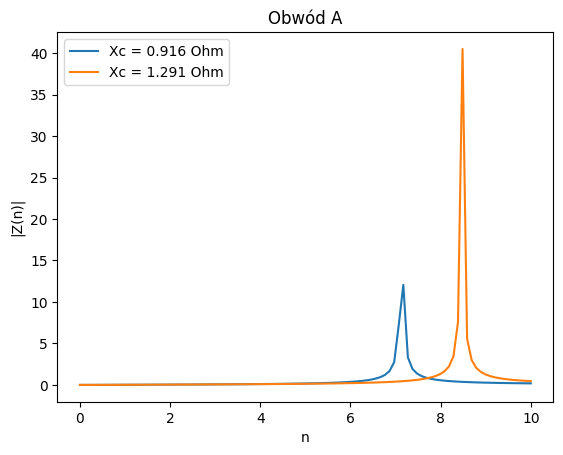

In [66]:
plt.plot(n, Z_min, label=f'Xc = {Xc_min} Ohm')
plt.plot(n, Z_max, label=f'Xc = {Xc_max} Ohm')
plt.xlabel('n')
plt.ylabel('|Z(n)|')
plt.legend()
plt.title('Circ A')
plt.show()

# Circ B
It is assumed that the circuit consists two branches - first with single coil and the second branch with coil and capacitor


In [67]:
Xtr = 18e-3
Xc_min = 0.916
Xc_max = 1.291
n_min = 0
n_max = 10
Xd = 36.76e-3


In [68]:
Xc = Xc_min

n = np.linspace(n_min, n_max, 100)
Z2 = (n*Xtr*(n*n*Xd-Xc))/(n*n*(Xtr+Xd)-Xc)
Z_min = np.abs(Z2)

In [69]:
Xc = Xc_max

n = np.linspace(n_min, n_max, 100)
Z2 = (n*Xtr*(n*n*Xd-Xc))/(n*n*(Xtr+Xd)-Xc)
Z_max = np.abs(Z2)

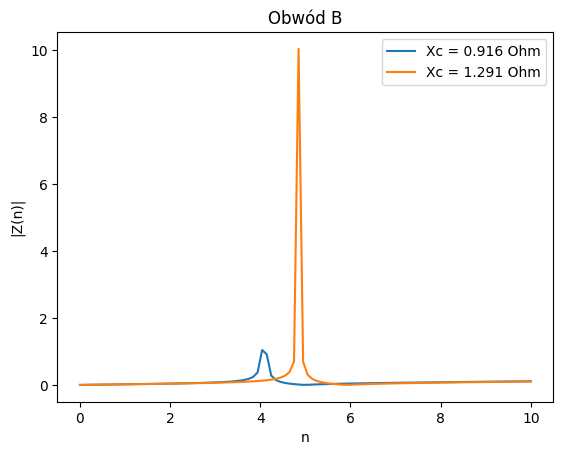

In [70]:
plt.plot(n, Z_min, label=f'Xc = {Xc_min} Ohm')
plt.plot(n, Z_max, label=f'Xc = {Xc_max} Ohm')
plt.xlabel('n')
plt.ylabel('|Z(n)|')
plt.legend()
plt.title('Obwód B')
plt.show()

# Ad 2

In [ ]:
def series(X1,X2)
    return X1+X2
def parallel(X1,X2)
    return (X1*X2)/(X1+X2)
    

In [9]:
# func to calculate reactance of L || C circuit
def parallel_lc(L, C, f):
    X1 = 2 * np.pi * f * L
    X2 = -1 / (2 * np.pi * f * C)
    return X1 * (-X2) / (X1 - X2) # included - bcs of fact X1,-Xc

In [10]:
# unc to calculate reactance of L -- C circuit
def series_lc(L, C, f):
    X1 = 2 * np.pi * f * L
    X2 = -1 / (2 * np.pi * f * C)
    return X1 -X2

In [11]:
n_min = 0 
n_max = 10
n = np.linspace(n_min, n_max, 100)
# circuit parameters
L = 18e-3  # coil induction in henr
f = 1000   # freq in Hz

In [12]:
# calculating reanctance for Xc = 1.281 Ohm
C1 = 1.291
Z1 = parallel(L, C1, f)
print(f'Circuit reactance for Xc = {C1:.3f} ohm: {Z1:.3f} ohm')


Reaktancja obwodu dla Xc = 1.291 ohm: 0.000 ohm


In [28]:
# calculating reanctance for Xc = 0.916 ohm
C2 = 0.916
Z2 = parallel(L, C2, f)
print(f'Circuit reactance for Xc = {C2:.3f} ohm: {Z2:.3f} ohm')

Reaktancja obwodu dla Xc = 0.916 ohm: -0.000 ohm


Text(0.5, 0, 'Xc (ohm)')

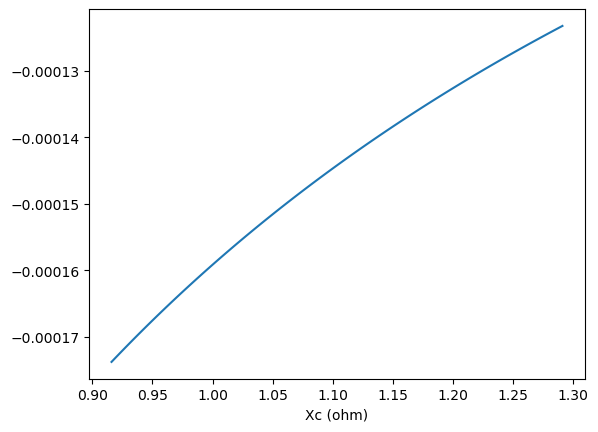

In [31]:
# plots for different values of Xc
Xc = np.linspace(0.916, 1.291, 100)
Z = [parallel(L, C, f) for C in Xc]
plt.plot(Xc, Z)
plt.xlabel('Xc (ohm)')

# Circuit B

In [ ]:
# reactance for Xtr
Xtr = 18e-3

# Ad 3

In [71]:
# main class to model circuit links

def poj(C, f):
    return -1j/(2*np.pi*f*C)

def ind(L, f):
    return 1j*np.pi * f * L

class Impedance:
    def __init__(self, impedance):
        self.imp = impedance
    
    def __float__(self):
        return float(np.sqrt(np.real(self.imp)**2 + np.imag(self.imp)**2))
    
    def __add__(self, other):
        return Impedance(self.imp + other.imp)
    
    def __truediv__(self, other):
        return Impedance((self.imp * other.imp) / (self.imp + other.imp))

# '+' - szeregowe, '/' - równoległe

# z1 = Impedance(poj(0.0002,50) + 10)
# z2 = Impedance(ind(0.1,50))

# uklad = (z1+z1)/(z2+z2)

# print(f"Impedacja z1 = {float(z1)}")
# print(f"Impedacja z2 = {float(z2)}")
# print(f"Impedacja układu = {float(uklad)}")

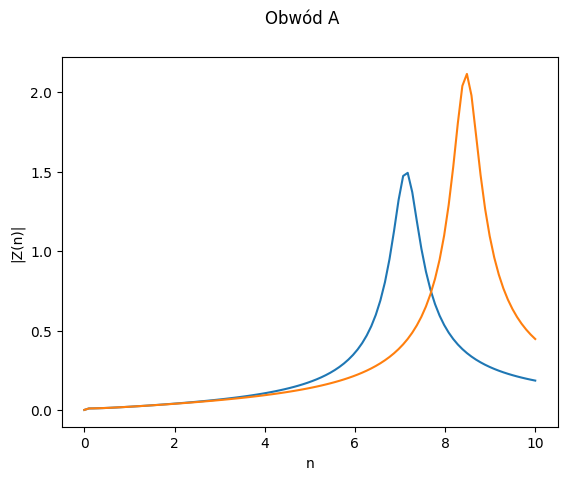

Rezonans dla obowdu A_min dla n = 7.1
Rezonans dla obowdu A_max dla n = 8.4


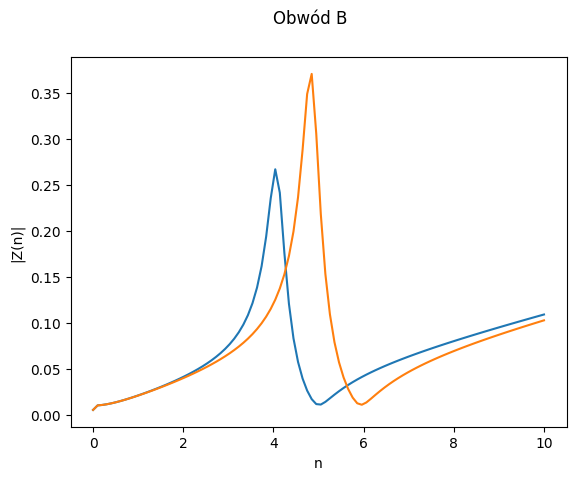

Rezonans dla obowdu B_min dla n = 4.0
Rezonans dla obowdu B_max dla n = 4.8


In [73]:
obwod_A_min = []
obwod_A_max = []
obwod_B_min = []
obwod_B_max = []

for i in n:
    ind = Impedance(1j*Xtr*i + Rl)

    if (i==0):
        cap_min = Impedance(0 + Rc)
        cap_max = Impedance(0 + Rc)
    else:
        cap_min = Impedance(-1j*Xc_min/i + Rc)
        cap_max = Impedance(-1j*Xc_max/i + Rc) 

    ind2 = Impedance(1j*Xd*i + Rl)

    A_min = ind / cap_min
    A_max = ind / cap_max
    B_min = ind / (ind2 + cap_min)
    B_max = ind / (ind2 + cap_max)

    obwod_A_min.append(float(A_min))
    obwod_A_max.append(float(A_max))
    obwod_B_min.append(float(B_min))
    obwod_B_max.append(float(B_max))

    
plt.plot(n, obwod_A_min, label=f'Xc = {Xc_min} Ohm')
plt.plot(n, obwod_A_max, label=f'Xc = {Xc_max} Ohm')
plt.suptitle('Circ A')
plt.ylabel('|Z(n)|')
plt.xlabel('n')
plt.show()
print(f'Rezonanse for circuit A_min for n = {obwod_A_min.index(max(obwod_A_min))/10}')
print(f'Rezonanse for circuit A_max for n = {obwod_A_max.index(max(obwod_A_max))/10}')

plt.plot(n, obwod_B_min, label=f'Xc = {Xc_min} Ohm')
plt.plot(n, obwod_B_max, label=f'Xc = {Xc_max} Ohm')
plt.suptitle('Circuit B')
plt.ylabel('|Z(n)|')
plt.xlabel('n')
plt.show()
print(f'Rezonanse for circuit B_min for n = {obwod_B_min.index(max(obwod_B_min))/10}')
print(f'Rezonanse for circuit B_max for n = {obwod_B_max.index(max(obwod_B_max))/10}')

# Ad 4

In [7]:
def format_output(analysis):
    sim_res_dict={}

    for node in analysis.nodes.values():
        data_label = "%s" % str(node)
        sim_res_dict[data_label] = np.array(node)
    return sim_res_dict 

# Circuit A

In [2]:
Rl = 10e-3
Rc = 1e-3
Xc_min = 1.291
Xc_max = 0.916
Xtr = 18e-3
Zl = complex(Rl, Xtr)
Zc_min = complex(Rc, Xc_min)
Zc_max = complex(Rc, Xc_max)
modul_c_min = abs(Zc_min)
modul_c_max = abs(Zc_max)
modul_l = abs(Zl)
L=18e-3/(2*np.pi*50)
Ld = 36.76e-3/(2*np.pi*50)
C_min = 1/(Xc_min*(2*np.pi*50))
C_max = 1/(Xc_min*(2*np.pi*50))

the Circuit/Netlist:

 .title Obwod A
Isine V1 0 DC 0A AC 1A SIN(0A 10A 50Hz 0s 0Hz)
L1 Vin 0 5.729577951308232e-05
R1 Vin 0 0.01
R3 V1 Vin 0
R2 V2 0 0.001
C1 V2 0 0.002465607174157945
R4 Vin V2 0



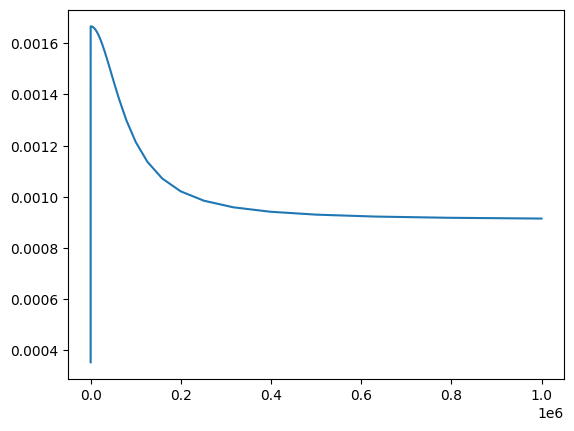

{'v2': array([-3.71483065e-05-1.71976206e-04j, -5.73801484e-05-2.11003778e-04j,
       -8.74209930e-05-2.55354235e-04j, -1.30543756e-04-3.02887586e-04j,
       -1.89533560e-04-3.49307886e-04j, -2.65124738e-04-3.88121414e-04j,
       -3.54275787e-04-4.11956190e-04j, -4.49683409e-04-4.15340304e-04j,
       -5.41734283e-04-3.97433031e-04j, -6.22080968e-04-3.62487912e-04j,
       -6.86305199e-04-3.17625037e-04j, -7.34126674e-04-2.69830163e-04j,
       -7.67886696e-04-2.24126427e-04j, -7.90833191e-04-1.83267266e-04j,
       -8.06030621e-04-1.48265761e-04j, -8.15923740e-04-1.19081980e-04j,
       -8.22291751e-04-9.51568690e-05j, -8.26360999e-04-7.57427936e-05j,
       -8.28949162e-04-6.00789783e-05j, -8.30590307e-04-4.74711584e-05j,
       -8.31628775e-04-3.73190080e-05j, -8.32284751e-04-2.91178283e-05j,
       -8.32698241e-04-2.24489899e-05j, -8.32957862e-04-1.69664642e-05j,
       -8.33119401e-04-1.23828663e-05j, -8.33217625e-04-8.45640776e-06j,
       -8.33273698e-04-4.97915887e-06j, -8.3

In [12]:
circuit = Circuit('Circuit A')

circuit.SinusoidalCurrentSource('sine', 'V1', circuit.gnd, amplitude=10, frequency=50)


circuit.L('1','Vin',circuit.gnd, L) ;
circuit.R('1','Vin',circuit.gnd, Rl);
circuit.R('3','V1','Vin', 0);

circuit.R('2','V2',circuit.gnd, Rc) ;
circuit.C('1','V2',circuit.gnd, C_min) ;
circuit.R('4','Vin','V2', 0);
# get the simulator
simulator = circuit.simulator(temperature = 25, nominal_temperature = 25);

# # start the AC analysis (AC freq. sweep)
analysis = simulator.ac(start_frequency=1, stop_frequency=1e6, number_of_points=10,  variation='dec')
#analysis = simulator.operating_point()
# #show the result - Vout voltage
# # analysis['Vout']
print("the Circuit/Netlist:\n\n",circuit)

fig = plt.plot(analysis.frequency,abs(analysis['Vin']))
plt.show()

out_dict = format_output(analysis)
print(out_dict)

# Circuit B

the Circuit/Netlist:

 .title Obwod B
Isine V1 0 DC 0A AC 1A SIN(0A 10A 50Hz 0s 0Hz)
L1 Vin 0 5.729577951308232e-05
R1 Vin 0 0.01
R3 V1 Vin 0
R4 Vin V2 0
R2 V2 0 0.011
L2 V2 0 0.00011701071416116145
C1 V2 0 0.002465607174157945



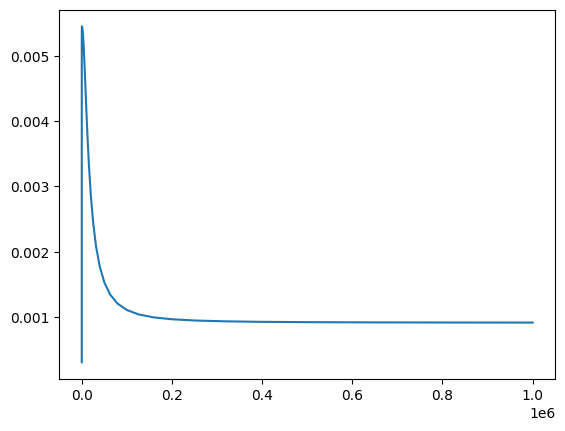

{'v2': array([ 1.07477743e-04-1.35960284e-04j,  1.23404220e-04-2.03170617e-04j,
        1.32297192e-04-2.89730570e-04j,  1.31232959e-04-3.97474135e-04j,
        1.17072943e-04-5.29035244e-04j,  8.54575342e-05-6.88027057e-04j,
        2.96339592e-05-8.78557284e-04j, -6.06698644e-05-1.10400103e-03j,
       -2.00046855e-04-1.36480753e-03j, -4.07183554e-04-1.65508358e-03j,
       -7.02226245e-04-1.95822655e-03j, -1.10009555e-03-2.24345775e-03j,
       -1.59980348e-03-2.46741665e-03j, -2.17469764e-03-2.58520453e-03j,
       -2.77315043e-03-2.56908214e-03j, -3.33471527e-03-2.42292693e-03j,
       -3.81264114e-03-2.18007796e-03j, -4.18672710e-03-1.88653385e-03j,
       -4.46079617e-03-1.58328071e-03j, -4.65199152e-03-1.29759387e-03j,
       -4.78082660e-03-1.04303011e-03j, -4.86556990e-03-8.23325959e-04j,
       -4.92034059e-03-6.36527647e-04j, -4.95519578e-03-4.77955366e-04j,
       -4.97692848e-03-3.41938324e-04j, -4.98993197e-03-2.22674317e-04j,
       -4.99689356e-03-1.14564643e-04j, -4.9

In [11]:
circuit = Circuit('Circuit B')

circuit.SinusoidalCurrentSource('sine', 'V1', circuit.gnd, amplitude=10, frequency=50)

circuit.L('1','Vin',circuit.gnd, L) 
circuit.R('1','Vin',circuit.gnd, Rl)
circuit.R('3','V1','Vin', 0)
circuit.R('4','Vin','V2', 0);

circuit.R('2','V2',circuit.gnd, Rc+Rl) 
circuit.L('2','V2',circuit.gnd, Ld) 
circuit.C('1','V2',circuit.gnd, C_max) ;

simulator = circuit.simulator(temperature = 25, nominal_temperature = 25);

# # start the AC analysis (AC freq. sweep)

analysis = simulator.ac(start_frequency=1, stop_frequency=1e6, number_of_points=10,  variation='dec')

print("the Circuit/Netlist:\n\n",circuit)

#for resistance in (circuit.R3, circuit.R4):
    #resistance.plus.add_current_probe(circuit)

#print(float(analysis.nodes['Vin']))

fig = plt.plot(analysis.frequency,abs(analysis['Vin']))
plt.show()

out_dict = format_output(analysis)
print(out_dict)